# Code for in silico screening of RNA-seq

In [1]:
import pandas as pd

In [2]:
#Import the data to pandas dataframe
data = pd.read_table('C:/research/RNAseq_database/RNAseq_sum/filtered/cuffdiff_result_mRNA_all_filtered.txt')

In [4]:
# In raw data, genes are represented as id.
data = data.rename(index ={6890:'PUM1'})
PUM1 = data[data.gene_symbol == 'PUM1']

In [5]:
PUM1t = PUM1.T

In [6]:
%matplotlib inline

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [8]:
PUM1change = PUM1t[3:].sort('PUM1')

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


# PUM1 target gene set

8414	ARF1
1283	ARHGEF10L
6732	ATP13A3
734 	ATP9A
16022	B3GALTL
11349	BRI3
8447	CALM2
2766	CD24
5409	CKS2
12680	CMTM8
4294	CSPG5
15771	CYP4X1
19236	EFNA3
1059	ERLEC1
19245	FOXD1
15017	GAS6
4383	GCA
6030	HERC2
271 	HFE
11634	ISCA2
7150	ISCU
12214	LMBRD1
1356	MCAM
3345	MEGF9
4836	MFSD1
13381	NAA20
638 	NOP16
7346	NOV
9952	NPTN
6587	PCNA
11093	POLR2H
8956	POLR2K
2583	PRPS2
6591	PTPRA
15501	RAB11B
1045	REEP1
1156	SEL1L
4478	SLC25A12
17176	SLC9A6
3555	SYNGR2
5389	TNFAIP6
15866	TRABD2A
16599	TRAPPC4
1398	UBE2A
4855	UBE2B
648 	VPS13D
11597	ZMYND19

In [9]:
target = data[data['gene_symbol'].isin(['ARF1','ARHGEF10L','ATP13A3','ATP9A','B3GALTL','BRI3','CALM2','CD24','CKS2','CMTM8','CSPG5','CYP4X1','EFNA3','ERLEC1','FOXD1','GAS6','GCA','HERC2','HFE','ISCA2','ISCU','LMBRD1','MCAM','MEGF9','MFSD1','NAA20','NOP16','NOV','NPTN','PCNA','POLR2H','POLR2K','PRPS2','PTPRA','RAB11B','REEP1','SEL1L','SLC25A12','SLC9A6','SYNGR2','TNFAIP6','TRABD2A','TRAPPC4','UBE2A','UBE2B','VPS13D','ZMYND19'])]

In [10]:
target = target.T

In [11]:
target = target.fillna(0)

In [12]:
target = target.convert_objects(convert_numeric=True)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


## PUM1 vs PUM1-targets  
To evaluate whether PUM1-targets are up-regulated or down-regulated, we count the number of genes that increased or decreased.

In [14]:
# if fold change is larger than 0.5, then the gene is up-regulated.
target["positive1"] = target[target > 0.5].count(axis =1)
target["negative1"] = target[target < -0.5].count(axis =1)
target["diff1"] = target["positive1"] - target["negative1"]

In [15]:
tat_diff1 = target.ix[3:, 49]
PUM1_vs_tatd1 = pd.concat([PUM1change, tat_diff1], axis =1)

PUM1_vs_tatd1 = PUM1_vs_tatd1.sort('PUM1')
PUM1_vs_tatd1 = PUM1_vs_tatd1.fillna(0) 

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [16]:
plt.style.use('publishable_style')

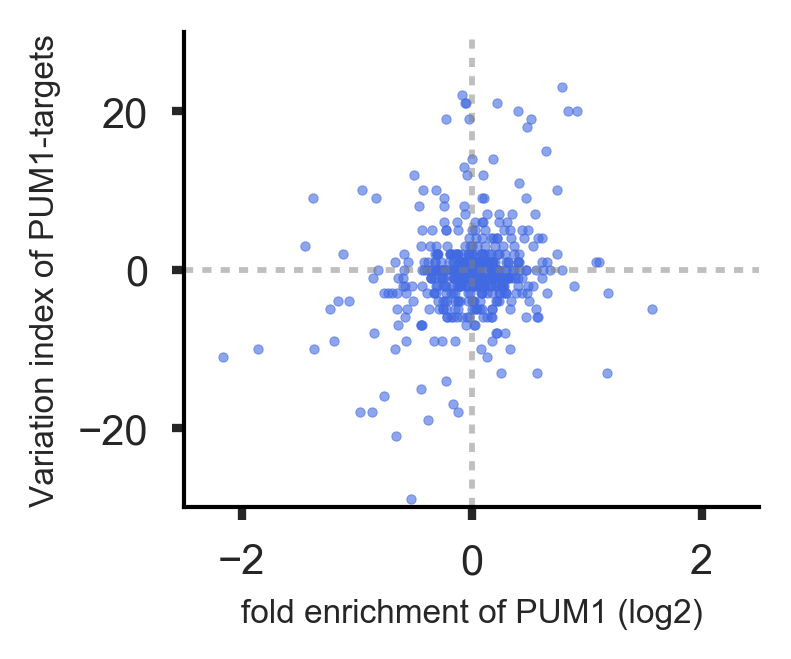

In [17]:
fig1 = plt.figure(figsize =(2.8,2.4), dpi=300)     # figure full size is 8.5*11 inch
ax3 = fig1.add_subplot(111)

ax3.scatter(PUM1_vs_tatd1['PUM1'], PUM1_vs_tatd1['diff1'], s = 5, alpha = 0.6, c = 'royalblue')
ax3.set_xlim(-2.5, 2.5)
ax3.set_ylim(-30, 30)
ax3.set_xlabel("fold enrichment of PUM1 (log2)", fontsize = 8)
ax3.set_ylabel("Variation index of PUM1-targets", fontsize = 8)

ax3.hlines(0,-2.5,2.5, color= 'gray', linestyle = ":", alpha = 0.5)
ax3.vlines(0,-30,30, color= 'gray', linestyle = ":", alpha = 0.5)

fig1.tight_layout()

#fig1.savefig('C:/Users/Toshimichi Yamada/OneDrive/PUM_paper/data/RNAsea_screening_scatter.png')